In [1]:
import pickle
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
plt.rcParams['figure.dpi'] = 300
from pathlib import Path
nw_dir = Path('../2_pipeline/12d_Preprocessing-Abbreviations_and_Biolink/out/').resolve()

from data_tools import combine_nodes_and_edges
from data_tools.wiki import get_curi_xrefs
import data_tools.df_processing as dt
from data_tools.plotting import count_plot_h

from biothings_client import get_client
mg = get_client('gene')

/home/rogertu/projects/MechRepoNet/mrn_venv/lib/python3.8/site-packages/data_tools/df_processing.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
node_color_map = {'AnatomicalEntity': "#8c88d7",
                'BiologicalProcessOrActivity': "#b75970",
                'MacromolecularMachine': "#e71761",
                'Disease': "#70c6ca",
                'Pathway': "#b1d34f",
                'PhenotypicFeature': "#154e56",
                'GeneFamily': "#5a3386",
                'PhysiologicalProcess': '#ec102f',
                'OrganismTaxon': "#e9bf98",
                'ChemicalSubstance': "#01c472",}

In [3]:
colors = sns.color_palette(["#01c472", "#e71761",  "#70c6ca",  "#5a3386", "#b75970",
                            "#154e56", "#e9bf98", "#8c88d7", "#b1d34f"])
sns.set_palette(colors)

In [4]:
nodes = pd.read_csv(nw_dir.joinpath('nodes.csv'), dtype=str)
edges = pd.read_csv(nw_dir.joinpath('edges.csv'), dtype=str)

In [5]:
combo = combine_nodes_and_edges(nodes, edges)

In [6]:
node_table = pd.read_csv('../2_pipeline/MOA_Analysis-Biolink/out/node_table.csv')
edge_table = pd.read_csv('../2_pipeline/MOA_Analysis-Biolink/out/edge_table.csv')
path_table = pd.read_csv('../2_pipeline/MOA_Analysis-Biolink/out/path_table.csv')

In [7]:
path_table

,path_num,path_len,in_nw,dir_in_nw,num_missing,frac_missing,missing_idx
0,0,2,True,True,0,0.000000,[]
1,1,3,True,True,0,0.000000,[]
2,2,3,True,True,0,0.000000,[]
3,3,2,False,False,1,0.500000,[0]
4,4,3,False,False,1,0.333333,[1]
...,...,...,...,...,...,...,...
119,119,1,False,False,1,1.000000,[0]
120,120,1,False,False,1,1.000000,[0]
121,121,6,False,False,4,0.666667,"[0, 1, 2, 4]"
122,122,5,False,False,3,0.600000,"[1, 2, 4]"


In [8]:
moa_paths = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx', 'paths')
moa_metapaths = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx', 'metapaths')
moa_ids = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx', 'node_ids')
ind_info = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx')

In [9]:
moa_ids

,n1,n2,n3,n4,n5,n6,n7,n8
0,MESH:D000068877,UniProt:P00519,MESH:D015464,NaN,NaN,NaN,NaN,NaN
1,MESH:D000068877,UniProt:P10721,GO:0008283,MESH:D034721,NaN,NaN,NaN,NaN
2,MESH:D000068877,UniProt:P16234,GO:0008283,MESH:D034721,NaN,NaN,NaN,NaN
3,MESH:D000082,REACT:R-HSA-2162123,MESH:D010146,NaN,NaN,NaN,NaN,NaN
4,MESH:D000082,UniProt:P23219,MESH:D011453,MESH:D010146,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
118,MESH:C484071,UniProt:P63098,UniProt:O95644,UniProt:P60568,CL:0000084,MESH:D014605,NaN,NaN
119,"MESH:D000585, MESH:D006604",MESH:D014010,NaN,NaN,NaN,NaN,NaN,NaN
120,MESH:D007559,InterPro:IPR015680,CHEBI:17996,GO:0060081,MESH:D010243,NCBITaxon:6282,MESH:D009855,NaN
121,MESH:D000069547,UniProt:Q9HB55,MESH:D000069446,UniProt:P04585,GO:0019068,MESH:D015658,NaN,NaN


In [10]:
moa_ids_ends = moa_ids[['n2','n3','n4','n5','n6','n7','n8']].values.tolist()
moa_ids_ends = [[j for j in i if type(j)==str] for i in moa_ids_ends]

In [11]:
moa_ids_ends.append([])
path_table['moa_id_count'] = [len(i) for i in moa_ids_ends]

In [12]:
path_table['diff']= path_table['moa_id_count']-path_table['path_len']

In [13]:
path_table['diff']

0      0
1      0
2      0
3      0
4      0
      ..
119    0
120    5
121   -1
122   -1
123   -4
Name: diff, Length: 124, dtype: int64

In [14]:
moa_ids['n1_start']=moa_ids['n1'].apply(lambda x: x.split(', '))

In [15]:
moa_ids.explode('n1_start')

,n1,n2,n3,n4,n5,n6,n7,n8,n1_start
0,MESH:D000068877,UniProt:P00519,MESH:D015464,NaN,NaN,NaN,NaN,NaN,MESH:D000068877
1,MESH:D000068877,UniProt:P10721,GO:0008283,MESH:D034721,NaN,NaN,NaN,NaN,MESH:D000068877
2,MESH:D000068877,UniProt:P16234,GO:0008283,MESH:D034721,NaN,NaN,NaN,NaN,MESH:D000068877
3,MESH:D000082,REACT:R-HSA-2162123,MESH:D010146,NaN,NaN,NaN,NaN,NaN,MESH:D000082
4,MESH:D000082,UniProt:P23219,MESH:D011453,MESH:D010146,NaN,NaN,NaN,NaN,MESH:D000082
...,...,...,...,...,...,...,...,...,...
119,"MESH:D000585, MESH:D006604",MESH:D014010,NaN,NaN,NaN,NaN,NaN,NaN,MESH:D000585
119,"MESH:D000585, MESH:D006604",MESH:D014010,NaN,NaN,NaN,NaN,NaN,NaN,MESH:D006604
120,MESH:D007559,InterPro:IPR015680,CHEBI:17996,GO:0060081,MESH:D010243,NCBITaxon:6282,MESH:D009855,NaN,MESH:D007559
121,MESH:D000069547,UniProt:Q9HB55,MESH:D000069446,UniProt:P04585,GO:0019068,MESH:D015658,NaN,NaN,MESH:D000069547


In [16]:
moa_ids['n1']=moa_ids['n1_start']

In [17]:
moa_ids=moa_ids.explode('n1')

## Plot Results

In [18]:
edge_table['in_network'] = edge_table['fwd_edge_in_nw'] | edge_table['rev_edge_in_nw']
edge_table['in_network'].sum()

188

In [19]:
len(edge_table['in_network'])

418

In [20]:
edge_table['in_network'].sum() / len(edge_table['in_network'])

0.44976076555023925

In [21]:
de_dup_et = (edge_table.sort_values(['start_id', 'end_id', 'in_network'], ascending=[True, True, False])
                    .drop_duplicates(subset=['start_id', 'end_id']))
de_dup_et['in_network'].sum(), len(de_dup_et), de_dup_et['in_network'].sum() / len(de_dup_et)

(166, 369, 0.44986449864498645)

In [22]:
data = de_dup_et.groupby(['start_label', 'end_label'])['in_network'].sum().to_frame()
data['total'] = de_dup_et.groupby(['start_label', 'end_label']).apply(len)

In [23]:
data = data.reset_index()
data['frac'] = data['in_network'] / data['total']

In [24]:
frac_piv = data.pivot(index='end_label', columns='start_label', values='frac')
total_piv = data.pivot(index='end_label', columns='start_label', values='total')
in_nw_piv = data.pivot(index='end_label', columns='start_label', values='in_network')

In [25]:
import networkx as nx
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from data_tools import plotting as pt

In [26]:
dmdb_to_mrn_nt = {'Anatomy' : 'AnatomicalEntity',
'Biological Process' : 'BiologicalProcessOrActivity',
'Cell Type' : 'AnatomicalEntity',
'Cellular Component' : 'AnatomicalEntity',
'Compound' : 'ChemicalSubstance',
'Compound Class' : 'ChemicalSubstance',
'Disease' : 'Disease',
'Drug' : 'ChemicalSubstance',
'Molecular Function' : 'BiologicalProcessOrActivity',
'Pathway' : 'Pathway',
'Phenotype' : 'PhenotypicFeature',
'Protein' : 'MacromolecularMachine',
'Protein Family' : 'MacromolecularMachine',
'Taxon' : 'OrganismTaxon'}

dmdb_colors = {k: node_color_map[v] for k, v in dmdb_to_mrn_nt.items()}

In [27]:
nx.__version__

'2.6.2'

In [28]:
de_dup_et['in_network'].sum() / len(de_dup_et)

0.44986449864498645

In [29]:
de_dup_et['in_network'].sum()

166

In [30]:
len(de_dup_et)

369

/home/rogertu/projects/MechRepoNet/mrn_venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


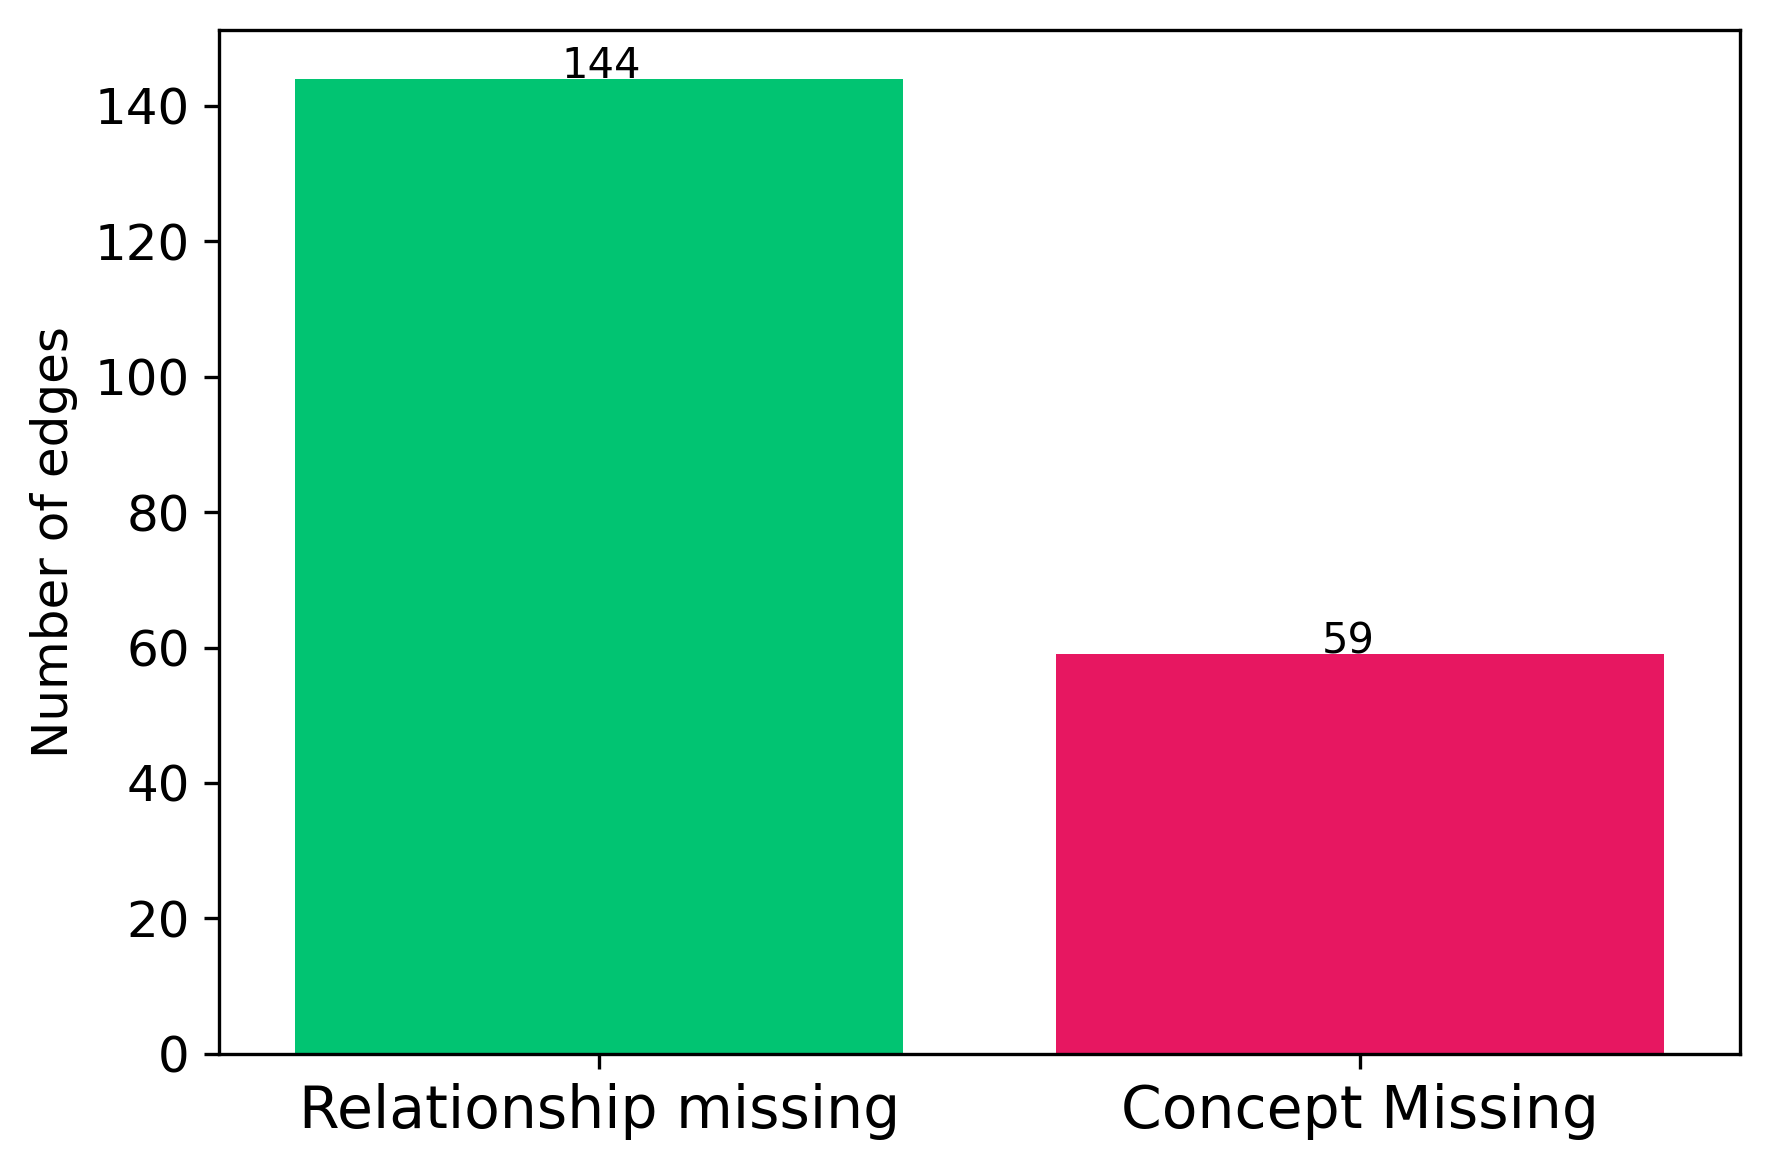

In [31]:
fig = plt.figure()
fig.set_tight_layout(True)
ax = sns.countplot(de_dup_et.query('not in_network')['nodes_missing'].map({0:'Relationship missing', 1: 'Concept Missing', 2: 'Concept Missing'}), saturation=1)
plt.ylabel('Number of edges', size=12)
plt.yticks(size=12)
plt.xticks(size=14)
plt.xlabel('')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+.1))
                                                
#plt.savefig('dmdb_edge_missing.pdf');
#plt.title('Number of nodes missing for a given missing Edge');

In [32]:
144+59

203

In [33]:
137+77

214

In [34]:
77/(137+77)

0.3598130841121495

In [35]:
new_piv = []
for r_num, (rowa, rowb) in enumerate(zip(in_nw_piv.itertuples(index=False), total_piv.itertuples(index=False))):
    new_r = []
    for c_num, (item1, item2) in enumerate(zip(rowa, rowb)):
        if not pd.isnull(item1):
            new_r.append('{} /\n{}'.format(int(item1), int(item2)))
        else:
            new_r.append(item1)
    new_piv.append(new_r)

In [36]:
str_piv = pd.DataFrame(new_piv, index=in_nw_piv.index, columns=in_nw_piv.columns)

In [37]:
'{:}'.format('12 / 23')

'12 / 23'

In [38]:
id_to_name = node_table.set_index('nid')['name'].to_dict()

In [39]:
combo.query(' end_id == "GO:0009252" and start_label != "Drug"')['start_label'].value_counts()

Gene              100
Protein            23
Protein Family      9
Compound            3
Name: start_label, dtype: int64

In [40]:
qr = de_dup_et.query('start_label == "Protein" and end_label == "Biological Process" and not in_network').copy()
qr['s_name'] = qr['start_id'].map(id_to_name)
qr['e_name'] = qr['end_id'].map(id_to_name)
qr.sample(10)

,start_id,end_id,start_nw_id,end_nw_id,fwd_edge_in_nw,rev_edge_in_nw,start_label,end_label,start_nw_label,end_nw_label,start_in_nw,end_in_nw,in_network,paring_missing,nodes_missing,s_name,e_name
243,UniProt:Q16236,GO:0006979,NCBIGene:4780,GO:0006979,False,False,Protein,Biological Process,Gene,Biological Process,True,True,False,True,0,Nrf2,Oxidative Stress
76,UniProt:P20831,GO:0006260,NaN,GO:0006260,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,DNA gyrase,Bactierial DNA Replication|Bacterial DNA repli...
72,UniProt:P0C1U9,GO:0006260,NaN,GO:0006260,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,Topoisomeraze 4,Bactierial DNA Replication|Bacterial DNA repli...
350,UniProt:P19235,GO:0030218,NCBIGene:2057,GO:0030218,False,False,Protein,Biological Process,Gene,Biological Process,True,True,False,True,0,erythropoietin receptor,erythrocyte differentiation
149,UniProt:O05131,GO:0009252,NaN,GO:0009252,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,Penicillin-binding protein 2B,Bacterial Cell Wall Synthesis|Peptidoglycan Bi...
66,UniProt:P0A7J3,GO:0006412,NaN,GO:0006412,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,50S Ribosomal Subunit,Bacterial Protein Synthesis|Bacterial Translation
98,UniProt:P35367,GO:0034776,NCBIGene:3269,GO:0034776,False,False,Protein,Biological Process,Gene,Biological Process,True,True,False,True,0,histamine H1 Receptor,histamine response|response to histamine
153,UniProt:Q81VT3,GO:0006412,NaN,GO:0006412,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,elongation factor g,Bacterial Protein Synthesis|Bacterial Translation
369,UniProt:P9WGY7,GO:0032774,NaN,GO:0032774,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,DNA-directed RNA polymerase subunit beta,RNA synthesis
230,UniProt:P44469,GO:0009252,NaN,GO:0009252,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1,Penicillin-binding proteins,Bacterial Cell Wall Synthesis|Peptidoglycan Bi...


In [41]:
frac_piv

start_label,Anatomy,Biological Process,Cell Type,Cellular Component,Compound,Compound Class,Disease,Drug,Molecular Function,Pathway,Phenotype,Protein,Protein Family,Taxon
end_label,,,,,,,,,,,,,,
Anatomy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN
Biological Process,0.0,0.142857,0.0,NaN,0.363636,0.0,NaN,0.166667,0.0,0.000000,NaN,0.392157,0.25,NaN
Cell Type,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN
Cellular Component,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
Compound,NaN,1.000000,NaN,NaN,NaN,0.0,NaN,0.000000,NaN,0.666667,NaN,0.714286,0.00,NaN
Compound Class,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.333333,NaN,NaN
Disease,1.0,0.714286,0.0,0.5,0.166667,0.5,0.0,0.000000,1.0,1.000000,0.0,1.000000,0.00,0.434783
Molecular Function,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN
Pathway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.800000,NaN,NaN


In [42]:
len(frac_piv)

13

In [43]:
edge_data = data.copy()

In [44]:
start_to_value = {l: i+1 for i, l in enumerate(sorted(edge_data['start_label'].unique()))}
end_to_value = {l: i+1 for i, l in enumerate(sorted(edge_data['end_label'].unique()))}

value_to_start = {v: k for k, v in start_to_value.items()}
value_to_end = {v: k for k, v in end_to_value.items()}

In [45]:
edge_data['x'] = edge_data['start_label'].map(start_to_value)
edge_data['y'] = edge_data['end_label'].map(end_to_value)

In [46]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [47]:
sns.set_style('whitegrid')

## See if we can have it match the color family of the rest of the figures

Need to create our own color map... Seaborn can help with that

# Paths

In [48]:
edge_table.head(2)

,start_id,end_id,start_nw_id,end_nw_id,fwd_edge_in_nw,rev_edge_in_nw,start_label,end_label,start_nw_label,end_nw_label,start_in_nw,end_in_nw,in_network,paring_missing,nodes_missing
0,MESH:D000068877,UniProt:P00519,CHEBI:31690,NCBIGene:25,True,False,Drug,Protein,Drug,Gene,True,True,True,False,0
1,UniProt:P00519,MESH:D015464,NCBIGene:25,DOID:8552,True,False,Protein,Disease,Gene,Disease,True,True,True,False,0


In [49]:
from collections import defaultdict

In [50]:
moa_ids = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx', 'node_ids')

In [51]:
n_cols = [c for c in moa_ids.columns if c.startswith('n')]

In [52]:
n_cols

['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8']

In [53]:
de_dup_et

,start_id,end_id,start_nw_id,end_nw_id,fwd_edge_in_nw,rev_edge_in_nw,start_label,end_label,start_nw_label,end_nw_label,start_in_nw,end_in_nw,in_network,paring_missing,nodes_missing
402,CHEBI:17996,GO:0060081,CHEBI:17996,GO:0060081,False,False,Compound,Biological Process,Compound,Biological Process,True,True,False,True,0
391,CHEBI:26523,MESH:C028025,CHEBI:26523,CHEBI:15430,False,False,Compound Class,Compound,Compound,Compound,True,True,False,True,0
397,CL:0000084,MESH:D014605,CL:0000084,DOID:13141,False,False,Cell Type,Disease,Cell Type,Disease,True,True,False,True,0
269,CL:0000169,UniProt:P01308,CL:0000169,NCBIGene:3630,False,False,Cell Type,Protein,Cell Type,Gene,True,True,False,True,0
352,CL:0000232,MESH:D000740,CL:0000232,DOID:2355,False,False,Cell Type,Disease,Cell Type,Disease,True,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,UniProt:Q81VT3,GO:0006412,NaN,GO:0006412,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1
83,UniProt:Q8DR59,GO:0009252,NaN,GO:0009252,False,False,Protein,Biological Process,NaN,Biological Process,False,True,False,False,1
157,UniProt:Q9BQB6,MESH:D014812,NCBIGene:79001,CHEBI:18067,True,False,Protein,Compound,Gene,Drug,True,True,True,False,0
409,UniProt:Q9HB55,MESH:D000069446,NCBIGene:64816,CHEBI:37924,False,False,Protein,Compound,Gene,Drug,True,True,False,True,0


In [54]:
moa_ids

,n1,n2,n3,n4,n5,n6,n7,n8
0,MESH:D000068877,UniProt:P00519,MESH:D015464,NaN,NaN,NaN,NaN,NaN
1,MESH:D000068877,UniProt:P10721,GO:0008283,MESH:D034721,NaN,NaN,NaN,NaN
2,MESH:D000068877,UniProt:P16234,GO:0008283,MESH:D034721,NaN,NaN,NaN,NaN
3,MESH:D000082,REACT:R-HSA-2162123,MESH:D010146,NaN,NaN,NaN,NaN,NaN
4,MESH:D000082,UniProt:P23219,MESH:D011453,MESH:D010146,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
118,MESH:C484071,UniProt:P63098,UniProt:O95644,UniProt:P60568,CL:0000084,MESH:D014605,NaN,NaN
119,"MESH:D000585, MESH:D006604",MESH:D014010,NaN,NaN,NaN,NaN,NaN,NaN
120,MESH:D007559,InterPro:IPR015680,CHEBI:17996,GO:0060081,MESH:D010243,NCBITaxon:6282,MESH:D009855,NaN
121,MESH:D000069547,UniProt:Q9HB55,MESH:D000069446,UniProt:P04585,GO:0019068,MESH:D015658,NaN,NaN


In [55]:
moa_ids_ends = moa_ids[['n2','n3','n4','n5','n6','n7','n8']].values.tolist()

In [56]:
[[j for j in i if type(j)==str] for i in moa_ids_ends]

[['UniProt:P00519', 'MESH:D015464'],
 ['UniProt:P10721', 'GO:0008283', 'MESH:D034721'],
 ['UniProt:P16234', 'GO:0008283', 'MESH:D034721'],
 ['REACT:R-HSA-2162123', 'MESH:D010146'],
 ['UniProt:P23219', 'MESH:D011453', 'MESH:D010146'],
 ['UniProt:P35354', 'MESH:D011453', 'MESH:D010146'],
 ['REACT:R-HSA-2162123', 'UBERON:0000955', 'GO:0001659', 'MESH:D005334'],
 ['UniProt:P23219', 'MESH:D011453', 'MESH:D010146'],
 ['UniProt:P35354', 'MESH:D011453', 'MESH:D010146'],
 ['UniProt:P23219',
  'REACT:R-HSA-2162123',
  'MESH:D013928',
  'GO:0007596',
  'MESH:D013927'],
 ['UniProt:P23219', 'GO:0007596', 'MESH:D013927'],
 ['UniProt:P35354', 'MESH:D011453', 'GO:0006954', 'MESH:D010146'],
 ['UniProt:P43702', 'GO:0006260', 'NCBITaxon:622', 'MESH:D004405'],
 ['GO:0003746', 'GO:0006412', 'NCBITaxon:622', 'MESH:D004405'],
 ['UniProt:P04083', 'REACT:R-HSA-2162123', 'GO:0006954', 'MESH:D007634'],
 ['UniProt:P23219', 'MESH:D011453', 'GO:0006954', 'MESH:D007634'],
 ['UniProt:P04083', 'GO:0050900', 'GO:000695

In [57]:
moa_ids_ends = [[j for j in i if type(j)==str] for i in moa_ids_ends]

In [58]:
[i.split(', ') for i in moa_ids['n1']]

[['MESH:D000068877'],
 ['MESH:D000068877'],
 ['MESH:D000068877'],
 ['MESH:D000082'],
 ['MESH:D000082'],
 ['MESH:D000082'],
 ['MESH:D000082'],
 ['MESH:D001241'],
 ['MESH:D001241'],
 ['MESH:D001241'],
 ['MESH:D001241'],
 ['MESH:D009288'],
 ['MESH:D009643'],
 ['MESH:D009643'],
 ['MESH:D003348'],
 ['MESH:D003348'],
 ['MESH:D003348'],
 ['MESH:D003348'],
 ['MESH:D003348'],
 ['MESH:D000077562'],
 ['MESH:D008795'],
 ['MESH:D003707'],
 ['MESH:D003707'],
 ['MESH:D000658'],
 ['MESH:C106856'],
 ['MESH:C106856'],
 ['MESH:D000583'],
 ['MESH:D003907'],
 ['MESH:D002442'],
 ['MESH:D020110'],
 ['MESH:C101425'],
 ['MESH:D000865'],
 ['MESH:D064704'],
 ['MESH:D000077239'],
 ['MESH:D009553'],
 ['MESH:C007852'],
 ['MESH:D000068298'],
 ['MESH:D000068298'],
 ['MESH:D005476'],
 ['MESH:D005476'],
 ['MESH:D016593'],
 ['MESH:C106538'],
 ['MESH:D009640'],
 ['MESH:C092292'],
 ['MESH:C004649'],
 ['MESH:D005640'],
 ['MESH:D002443'],
 ['MESH:D005672'],
 ['MESH:D014859'],
 ['MESH:C415771'],
 ['MESH:D015296'],
 ['MESH:D0

In [59]:
moa_ids2 = pd.DataFrame({'start':[i.split(', ') for i in moa_ids['n1']],
                         'end':moa_ids_ends})

In [60]:
moa_ids3 = moa_ids2.explode('start').explode('end')

In [61]:
moa_ids3

,start,end
0,MESH:D000068877,UniProt:P00519
0,MESH:D000068877,MESH:D015464
1,MESH:D000068877,UniProt:P10721
1,MESH:D000068877,GO:0008283
1,MESH:D000068877,MESH:D034721
...,...,...
121,MESH:D000069547,MESH:D015658
122,MESH:C000609138,UniProt:Q9NZQ7
122,MESH:C000609138,GO:0036037
122,MESH:C000609138,GO:0008283


In [62]:
moa_ids3 = moa_ids3.reset_index()

In [63]:
path_table = defaultdict(list)

for i in range(len(moa_ids)):
    cur_path = []
    cur_path_dir = []
    cur_miss = []
    
    for j in range(len(n_cols) - 1):
        if pd.isnull(moa_ids.iloc[i, j+1]):
            break
        else:
            start = moa_ids.iloc[i, j].strip()
            end = moa_ids.iloc[i, j+1].strip()
            
        try:    
            in_network = de_dup_et.query('start_id == @start and end_id == @end')['in_network'].iloc[0]
            fwd_in_network = de_dup_et.query('start_id == @start and end_id == @end')['fwd_edge_in_nw'].iloc[0]
        
        #if not in_network:
        except:
            cur_miss.append(j)
        
        cur_path.append(in_network)
        cur_path_dir.append(fwd_in_network)
        
    path_table['path_num'].append(i)
    path_table['path_len'].append(len(cur_path))
    path_table['in_nw'].append(all(cur_path))
    path_table['dir_in_nw'].append(all(cur_path_dir))
    path_table['num_missing'].append(len(cur_path) - sum(cur_path))
    path_table['frac_missing'].append(len(cur_miss) / len(cur_path))
    path_table['missing_idx'].append(cur_miss)

In [64]:
path_table = pd.DataFrame(path_table)

In [65]:
path_table.head(5)

,path_num,path_len,in_nw,dir_in_nw,num_missing,frac_missing,missing_idx
0,0,2,True,True,0,0.0,[]
1,1,3,True,True,0,0.0,[]
2,2,3,True,True,0,0.0,[]
3,3,2,False,False,1,0.0,[]
4,4,3,False,False,1,0.0,[]


In [66]:
path_table['in_nw'].sum() / len(path_table)

0.16260162601626016

In [67]:
path_table['in_nw'].sum() 

20

/home/rogertu/projects/MechRepoNet/mrn_venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


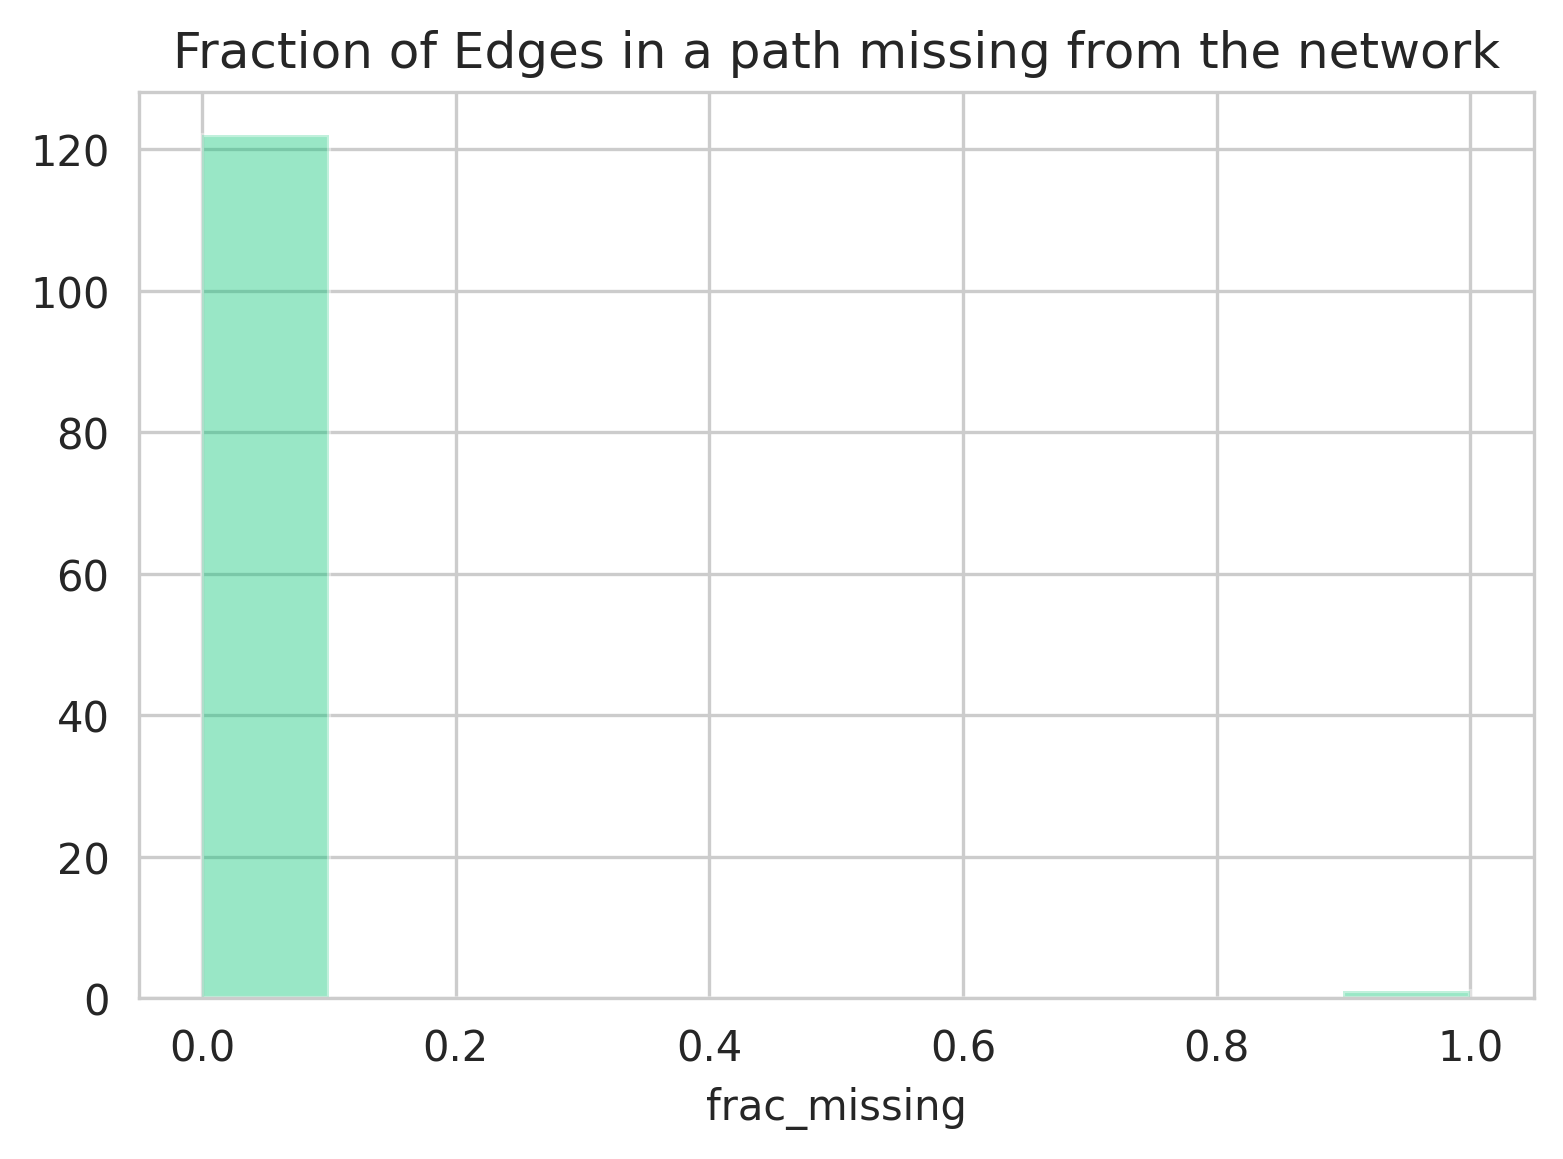

In [68]:
sns.distplot(path_table['frac_missing'], kde=False, bins=10)
plt.title('Fraction of Edges in a path missing from the network');

In [69]:
qr = path_table.query('in_nw')['path_num'].tolist()
res = moa_paths.loc[qr].dropna(axis=1, how='all')

In [70]:
res

,n1,e1,n2,e2,n3,e3,n4,e4,n5
0,imatinib,INHIBITS,BCR/ABL,CAUSES,CML (ph+),NaN,NaN,NaN,NaN
1,imatinib,INHIBITS,c-Kit,UP_REGULATES,Cellular proliferation,CAUSES,Systemic mast cell disease,NaN,NaN
2,imatinib,INHIBITS,Pdgf,UP_REGULATES,Cellular proliferation,CAUSES,Systemic mast cell disease,NaN,NaN
5,acetaminophen,INHIBITS,Cox-2,PRODUCES,Prostaglandins,CAUSES,Pain,NaN,NaN
8,acetylsalicylic acid,INHIBITS,Cox-2,PRODUCES,Prostaglandins,CAUSES,Pain,NaN,NaN
48,warfarin,INHIBITS,vitamin k reductase,PRODUCES,reduced vitamin k,PART_OF,Coagulation factor Synthesis,CAUSES,Pulmonary embolism
52,oxymetazoline,ACTIVATES,Alpha-1a adrenergic receptor,UP_REGULATES,Vasoconstriction,REDUCES,Nasal Congestion,NaN,NaN
55,duloxetine,INHIBITS,sodium dependent serotonin transporter,INVOLVED_IN,Neuronal serotonin reuptake,CAUSES,major depressive disorder,NaN,NaN
61,sildenafil,INHIBITS,phosphodisterase type 5,REDUCES,cGMP,PART_OF,Vasodilation,DISRUPTED_IN,Erectile Disfunction
79,terguride,INHIBITS,5-Hydroxytryptamine receptor 2B,UPREGULATED_IN,Pulmonary hypertension,NaN,NaN,NaN,NaN


In [71]:
res_ids = moa_ids.loc[qr].dropna(axis=1, how='all')

In [72]:
all_xrefs = []
for curi in res_ids.stack().apply(lambda x: x.split(':')[0]).unique():
    all_xrefs.append(get_curi_xrefs(nodes, curi))
all_xrefs = pd.concat(all_xrefs, sort=False, ignore_index=True)
all_xref_map = all_xrefs.groupby('xrefs')['id'].apply(set).to_dict()

In [73]:
all_xrefs.query('xrefs == "MESH:D007172"')

,id,xrefs
8626,DOID:1875,MESH:D007172


In [74]:
moa_ids = pd.read_excel('../0_data/manual/indication_MOA_paths.xlsx', 'node_ids')

In [75]:
test_ids = moa_ids
test_ids['n1'] = test_ids['n1'].apply(lambda s: s.split(', '))

In [76]:
from data_tools.df_processing import expand_df_on_col

In [77]:
test_ids = expand_df_on_col(test_ids, 'n1', False)

In [78]:
test_ids

,n1,n2,n3,n4,n5,n6,n7,n8
0,MESH:D000068877,UniProt:P00519,MESH:D015464,NaN,NaN,NaN,NaN,NaN
1,MESH:D000068877,UniProt:P10721,GO:0008283,MESH:D034721,NaN,NaN,NaN,NaN
2,MESH:D000068877,UniProt:P16234,GO:0008283,MESH:D034721,NaN,NaN,NaN,NaN
3,MESH:D000082,REACT:R-HSA-2162123,MESH:D010146,NaN,NaN,NaN,NaN,NaN
4,MESH:D000082,UniProt:P23219,MESH:D011453,MESH:D010146,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
119,MESH:D000585,MESH:D014010,NaN,NaN,NaN,NaN,NaN,NaN
120,MESH:D006604,MESH:D014010,NaN,NaN,NaN,NaN,NaN,NaN
121,MESH:D007559,InterPro:IPR015680,CHEBI:17996,GO:0060081,MESH:D010243,NCBITaxon:6282,MESH:D009855,NaN
122,MESH:D000069547,UniProt:Q9HB55,MESH:D000069446,UniProt:P04585,GO:0019068,MESH:D015658,NaN,NaN


In [79]:
def mapper_func(x):
    if pd.isnull(x):
        return float('nan')
    out = all_xref_map.get(x, 'missing')
    if type(out) == set:
        return list(out)
    return out

In [80]:
test_ids = test_ids.applymap(mapper_func)

In [81]:
test_ids

,n1,n2,n3,n4,n5,n6,n7,n8
0,[CHEBI:31690],[NCBIGene:25],[DOID:8552],NaN,NaN,NaN,NaN,NaN
1,[CHEBI:31690],[NCBIGene:3815],[GO:0008283],"[DOID:349, DOID:4660, DOID:4798]",NaN,NaN,NaN,NaN
2,[CHEBI:31690],[NCBIGene:5156],[GO:0008283],"[DOID:349, DOID:4660, DOID:4798]",NaN,NaN,NaN,NaN
3,[CHEBI:29081],missing,"[DOID:60164, DOID:60145]",NaN,NaN,NaN,NaN,NaN
4,[CHEBI:29081],[NCBIGene:5742],missing,"[DOID:60164, DOID:60145]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
119,[CHEBI:74789],[DOID:9060],NaN,NaN,NaN,NaN,NaN,NaN
120,[CHEBI:4637],[DOID:9060],NaN,NaN,NaN,NaN,NaN,NaN
121,[CHEBI:6078],missing,missing,[GO:0060081],"[HP:0003470, DOID:80000]",missing,[DOID:11678],NaN
122,missing,[NCBIGene:64816],[CHEBI:37924],missing,[GO:0019068],[DOID:526],NaN,NaN


In [82]:
for col in test_ids:
    test_ids = expand_df_on_col(test_ids, col, False)

In [83]:
test_ids

,n1,n2,n3,n4,n5,n6,n7,n8
0,CHEBI:31690,NCBIGene:25,DOID:8552,NaN,NaN,NaN,NaN,NaN
1,CHEBI:31690,NCBIGene:3815,GO:0008283,DOID:349,NaN,NaN,NaN,NaN
2,CHEBI:31690,NCBIGene:3815,GO:0008283,DOID:4660,NaN,NaN,NaN,NaN
3,CHEBI:31690,NCBIGene:3815,GO:0008283,DOID:4798,NaN,NaN,NaN,NaN
4,CHEBI:31690,NCBIGene:5156,GO:0008283,DOID:349,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
179,CHEBI:6078,missing,missing,GO:0060081,HP:0003470,missing,DOID:11678,NaN
180,CHEBI:6078,missing,missing,GO:0060081,DOID:80000,missing,DOID:11678,NaN
181,missing,NCBIGene:64816,CHEBI:37924,missing,GO:0019068,DOID:526,NaN,NaN
182,missing,NCBIGene:29126,GO:0036037,GO:0008283,HP:0030447,NaN,NaN,NaN


In [84]:
out_dir = Path('../2_pipeline/MOA_Analysis-Biolink/out/').resolve()
out_dir.mkdir(exist_ok=True, parents=True)

In [85]:
#test_ids.to_csv(out_dir.joinpath('mapped_vs_missing.csv'), index=False)

In [86]:
test_ids

,n1,n2,n3,n4,n5,n6,n7,n8
0,CHEBI:31690,NCBIGene:25,DOID:8552,NaN,NaN,NaN,NaN,NaN
1,CHEBI:31690,NCBIGene:3815,GO:0008283,DOID:349,NaN,NaN,NaN,NaN
2,CHEBI:31690,NCBIGene:3815,GO:0008283,DOID:4660,NaN,NaN,NaN,NaN
3,CHEBI:31690,NCBIGene:3815,GO:0008283,DOID:4798,NaN,NaN,NaN,NaN
4,CHEBI:31690,NCBIGene:5156,GO:0008283,DOID:349,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
179,CHEBI:6078,missing,missing,GO:0060081,HP:0003470,missing,DOID:11678,NaN
180,CHEBI:6078,missing,missing,GO:0060081,DOID:80000,missing,DOID:11678,NaN
181,missing,NCBIGene:64816,CHEBI:37924,missing,GO:0019068,DOID:526,NaN,NaN
182,missing,NCBIGene:29126,GO:0036037,GO:0008283,HP:0030447,NaN,NaN,NaN


In [87]:
res_ids.applymap(lambda x: list(all_xref_map.get(x, x)) if type(all_xref_map.get(x, x)) == set else x)

,n1,n2,n3,n4,n5
0,[CHEBI:31690],[NCBIGene:25],[DOID:8552],NaN,NaN
1,[CHEBI:31690],[NCBIGene:3815],[GO:0008283],"[DOID:349, DOID:4660, DOID:4798]",NaN
2,[CHEBI:31690],[NCBIGene:5156],[GO:0008283],"[DOID:349, DOID:4660, DOID:4798]",NaN
5,[CHEBI:29081],[NCBIGene:5743],MESH:D011453,"[DOID:60164, DOID:60145]",NaN
8,[CHEBI:13719],[NCBIGene:5743],MESH:D011453,"[DOID:60164, DOID:60145]",NaN
48,[CHEBI:10033],[NCBIGene:79001],[CHEBI:18067],[GO:0007596],[DOID:9477]
52,[CHEBI:82162],[NCBIGene:148],[GO:0042310],[HP:0001742],NaN
55,[CHEBI:36797],[NCBIGene:6532],[GO:0051610],MESH:D003865,NaN
61,[CHEBI:58987],[NCBIGene:8654],[CHEBI:16356],[GO:0042311],[DOID:1875]
79,[CHEBI:32193],[NCBIGene:3357],[DOID:6432],NaN,NaN


In [88]:
from data_tools.df_processing import expand_split_col, expand_df_on_col

In [89]:
out_cols = res_ids.applymap(lambda x: list(all_xref_map.get(x, x)) if type(all_xref_map.get(x, x)) == set else x)

for col in out_cols:
    out_cols = expand_df_on_col(out_cols, col, False)

In [90]:
#out_cols.to_csv(out_dir.joinpath('paths_in_nw.csv'), index=False)

In [91]:
def format_to_list(row_num, df):
    print('{!r}'.format(df.loc[row_num].T.dropna().tolist()))

In [92]:
for idx in res_ids.index:
    format_to_list(idx, res_ids)

['MESH:D000068877', 'UniProt:P00519', 'MESH:D015464']
['MESH:D000068877', 'UniProt:P10721', 'GO:0008283', 'MESH:D034721']
['MESH:D000068877', 'UniProt:P16234', 'GO:0008283', 'MESH:D034721']
['MESH:D000082', 'UniProt:P35354', 'MESH:D011453', 'MESH:D010146']
['MESH:D001241', 'UniProt:P35354', 'MESH:D011453', 'MESH:D010146']
['MESH:D014859', 'UniProt:Q9BQB6', 'MESH:D014812', 'GO:0007596', 'MESH:D011655']
['MESH:D010109', 'UniProt:P35348', 'GO:0042310', 'MESH:D015508']
['MESH:D000068736', 'UniProt:P31645', 'GO:0051610', 'MESH:D003865']
['MESH:D000068677', 'UniProt:O76074', 'MESH:D006152', 'GO:0042311', 'MESH:D007172']
['MESH:C006208', 'UniProt:P41595', 'MESH:D006976']
['MESH:C077049', 'UniProt:P08588', 'GO:0045823', 'MESH:D013610']
['MESH:D000074', 'UniProt:Q9BQB6', 'MESH:D014812', 'GO:0007596', 'MESH:D011655']
['MESH:D008788', 'UniProt:P55017', 'GO:0055078', 'MESH:D006973']
['MESH:C039979', 'UniProt:P08908', 'GO:0050795', 'MESH:D003865']
['MESH:D014147', 'UniProt:P35372', 'GO:0019233', 'M

In [93]:
res.head(2)

,n1,e1,n2,e2,n3,e3,n4,e4,n5
0,imatinib,INHIBITS,BCR/ABL,CAUSES,CML (ph+),NaN,NaN,NaN,NaN
1,imatinib,INHIBITS,c-Kit,UP_REGULATES,Cellular proliferation,CAUSES,Systemic mast cell disease,NaN,NaN


In [94]:
#res.to_csv(out_dir.joinpath('in_nw.csv'), index=False)

In [95]:
path_table['num_missing'].value_counts()

2    32
3    30
1    27
0    20
4    14
Name: num_missing, dtype: int64

In [96]:
(27+20)/123

0.3821138211382114

In [97]:
path_table['num_missing'].value_counts().sum()

123

/home/rogertu/projects/MechRepoNet/mrn_venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


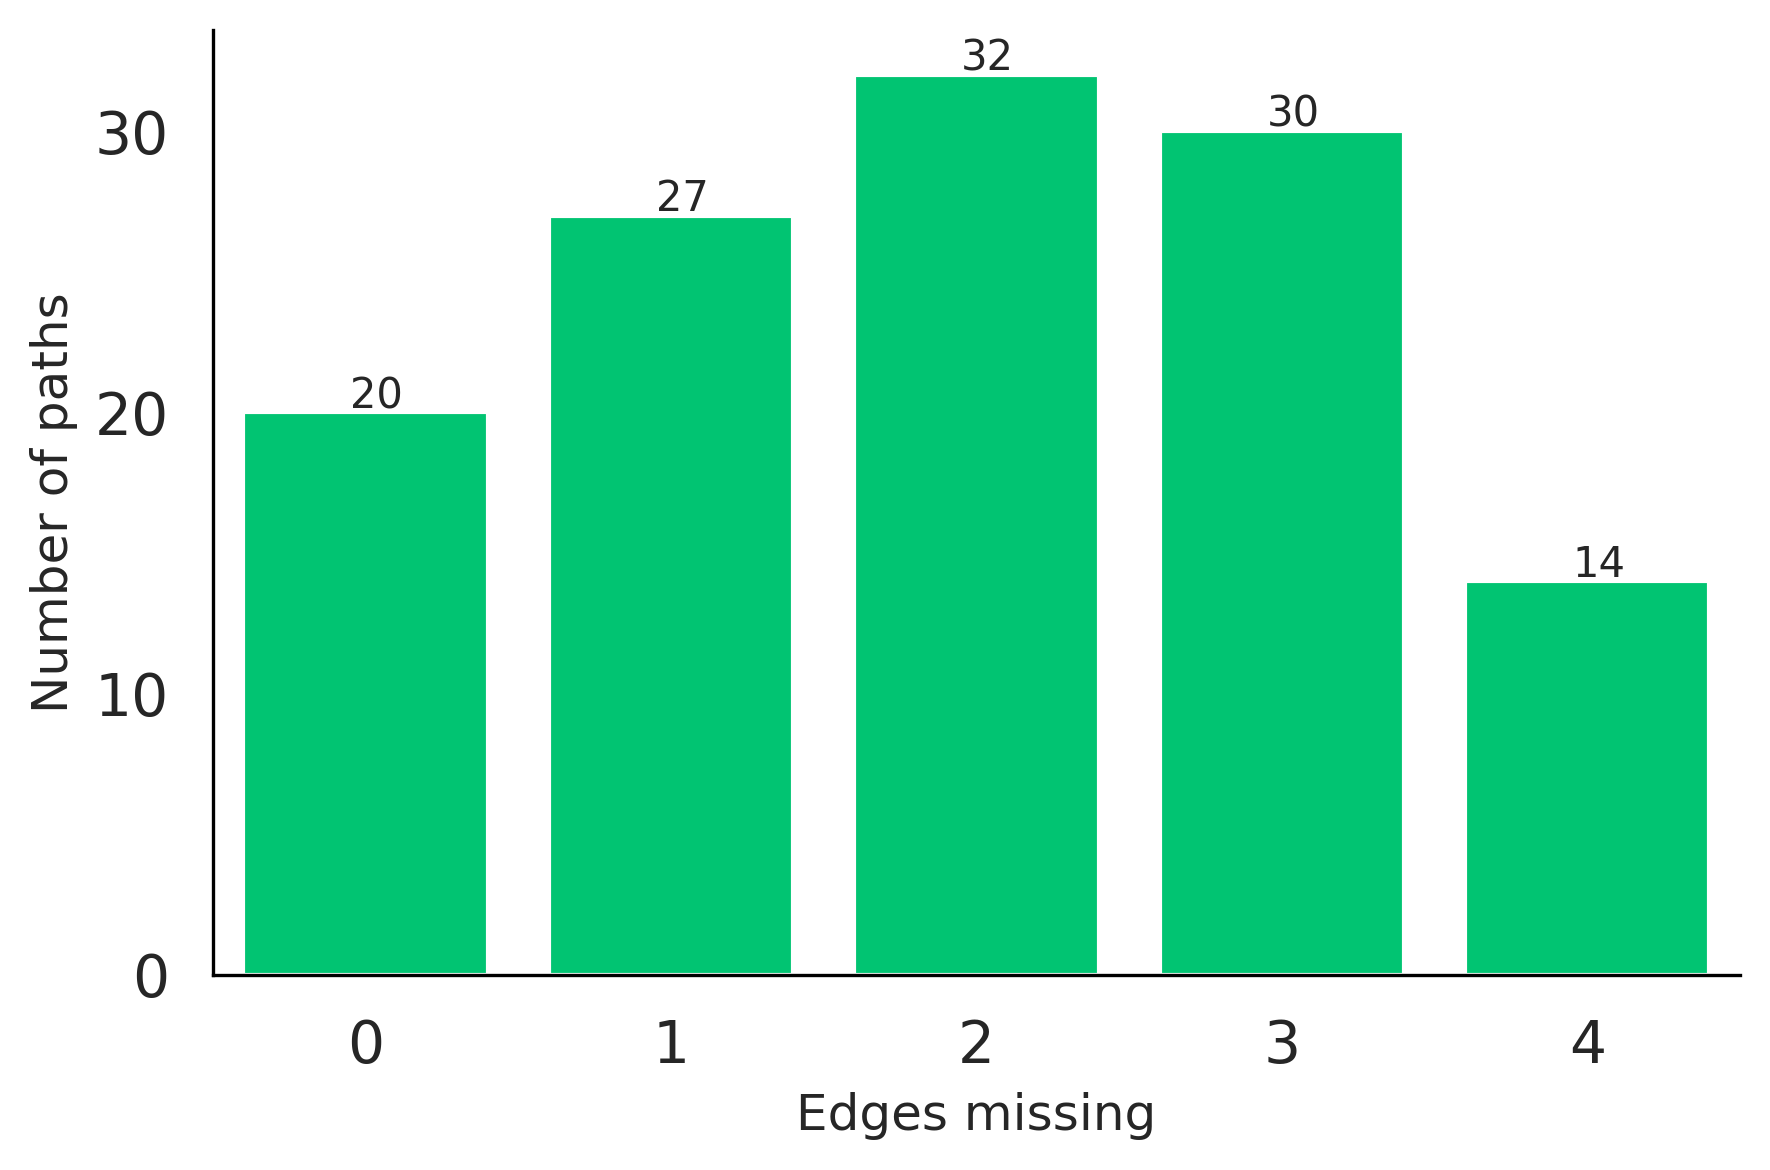

In [98]:
fig,ax = plt.subplots()
fig.set_tight_layout(True)
ax = sns.countplot(path_table['num_missing'], color=sns.color_palette()[0], saturation=1)
ax.grid(False)

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+.15))

ax.spines['left'].set_color('black')    
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(which='major', length=7)

#plt.title('Numer of Edges missing in DMDB path')
plt.xlabel('Edges missing', size=12)
plt.xticks(range(0,5,1),size=14,)
plt.ylabel('Number of paths', size=12)
plt.yticks(ticks =range(0,40,10), size=14)

plt.savefig('../3_figures/f3c.tif', dpi=350, bbox_inches='tight')
plt.show()
#plt.savefig('dmdb_paths_missing.pdf');